## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

### Imports

In [1]:
import os
import os.path as osp
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Load Data

In [2]:
column_names = [
    'id',
    'celebrate',
    'main_dish',
    'other_main_dish',
    'cooking_method',
    'other_cooking_method',
    'stuffing',
    'other_stuffing',
    'cranberry',
    'other_cranberry',
    'gravy',
    'brussel_sprouts',
    'carrots',
    'culiflower',
    'corn',
    'cornbread',
    'fruit_salad',
    'green_beans',
    'macaroni_cheese',
    'mashed_potatoes',
    'rolls_biscuits',
    'squash',
    'vegetable_salad',
    'yams_sweet_potatos',
    'other_sides_1',
    'other_sides_2',
    'apple_pie',
    'buttermilk_pie',
    'cherry_pie',
    'chocolate_pie',
    'coconut_cream_pie',
    'key_lime_pie',
    'peach_pie',
    'pecan_pie',
    'pumpkin_pie',
    'sweet_patato_pie',
    'no_pie',
    'other_pie_1',
    'other_pie_2',
    'apple_cobbler',
    'blondies',
    'brownies',
    'carror_cake',
    'cheesecake',
    'cookies',
    'fudge',
    'ice_cream',
    'peach_cobbler',
    'no_dessert',
    'other_dessert_1',
    'other_dessert_2',
    'pray',
    'travel_distance',
    'macys_parade',
    'kids_table_age',
    'hometown_friends',
    'friendsgiving',
    'shop_black_friday',
    'work_retal',
    'work_black_friday',
    'home_description',
    'age',
    'gender',
    'household_income',
    'us_region' 
]

In [3]:
def format_age(value):
    """Format the age column."""
    if isinstance(value, str):
        return [int(x) for x in re.findall(r'([\d]+)', value)]
    else:
        return value

In [4]:
def find_income(value):
    """Return a list of dollar values from a string."""
    if isinstance(value, str):
        return [int(x.replace(',', '')) for x in re.findall(r'\$([\d,]+)', value)]
    else:
        return value

In [5]:
def remove_empty_list(value):
    """Return numpy NaN when empty list is found."""
    if not isinstance(value, list):
        return value
    
    if len(value) == 0:
        return np.nan
    else:
        return value

In [6]:
data = pd.read_csv(osp.join('..', 'data', 'thanksgiving.csv'), encoding='Latin-1');
data.columns = column_names
data.shape
data.replace(to_replace='Other (please specify)', value=np.nan, inplace=True);
data.loc[:, 'age'] = data.age.apply(lambda x: format_age(x));
data.loc[:, 'household_income'] = data.household_income.apply(lambda x: find_income(x));
data = data.applymap(lambda x: remove_empty_list(x));
data.head()
data.tail()

(1058, 65)

,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,"[18, 29]",Male,"[75000, 99999]",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,NaN,Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,"[18, 29]",Female,"[50000, 74999]",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,"[18, 29]",Male,"[0, 9999]",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,"[30, 44]",Male,[200000],Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,"[30, 44]",Male,"[100000, 124999]",Pacific


,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
1053,4335944082,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,Yes,No,No,NaN,Rural,"[30, 44]",Female,"[100000, 124999]",Mountain
1054,4335943173,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Suburban,[60],Female,"[50000, 74999]",Pacific
1055,4335943060,Yes,NaN,Duck,Baked,NaN,Rice-based,NaN,None,NaN,...,Yes,Yes,Yes,No,NaN,Urban,[60],Male,"[100000, 124999]",Pacific
1056,4335934708,Yes,Turkey,NaN,Baked,NaN,None,NaN,Homemade,NaN,...,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1057,4335894916,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,id,other_sides_1,other_pie_1,other_dessert_1
count,1.058000e+03,0.0,0.0,0.0
mean,4.336731e+09,NaN,NaN,NaN
std,4.937834e+05,NaN,NaN,NaN
min,4.335895e+09,NaN,NaN,NaN
25%,4.336339e+09,NaN,NaN,NaN
50%,4.336797e+09,NaN,NaN,NaN
75%,4.337012e+09,NaN,NaN,NaN
max,4.337955e+09,NaN,NaN,NaN


### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


### Create a new dataframe that only includes people that celebrate Thanksgiving

In [8]:
celebrate = data[data.celebrate == 'Yes']
celebrate.head()
celebrate.tail()

,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,"[18, 29]",Male,"[75000, 99999]",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,NaN,Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,"[18, 29]",Female,"[50000, 74999]",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,"[18, 29]",Male,"[0, 9999]",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,"[30, 44]",Male,[200000],Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,"[30, 44]",Male,"[100000, 124999]",Pacific


,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
1053,4335944082,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,Yes,No,No,NaN,Rural,"[30, 44]",Female,"[100000, 124999]",Mountain
1054,4335943173,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Suburban,[60],Female,"[50000, 74999]",Pacific
1055,4335943060,Yes,NaN,Duck,Baked,NaN,Rice-based,NaN,None,NaN,...,Yes,Yes,Yes,No,NaN,Urban,[60],Male,"[100000, 124999]",Pacific
1056,4335934708,Yes,Turkey,NaN,Baked,NaN,None,NaN,Homemade,NaN,...,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1057,4335894916,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN


### Find out what the most popular main dish is.

In [9]:
celebrate.main_dish.describe()
celebrate.main_dish.mode()

count        939
unique         7
top       Turkey
freq         859
Name: main_dish, dtype: object

0    Turkey
dtype: object

### Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?

In [134]:
count = celebrate[(celebrate.main_dish == 'Tofurkey') & (celebrate.gravy == 'Yes')].count().id;
pct = count / celebrate.shape[0] * 100;
print(f'{pct:.2f}% of people you eat Tofurkey also have Gravy')

1.22% of people you eat Tofurkey also have Gravy


### What is the most popular pie?

In [11]:
all_pies = [n for n in column_names if 'pie' in n]
count_pies = celebrate[all_pies].count()
pie_type = count_pies.idxmax()
pie = ' '.join(pie_type.split('_')).capitalize()
pie_count = count_pies.max()
pie_pct = pie_count / count_pies.sum() * 100
print(f'{pie} is the most popular with {pie_count} total making up {pie_pct:.2f}%')

Pumpkin pie is the most popular with 729 total making up 32.57%


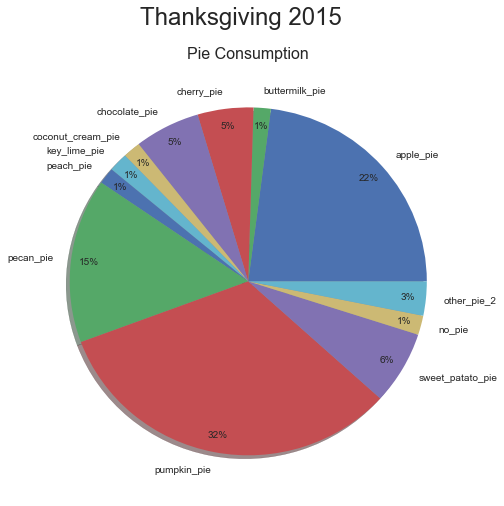

In [42]:
fig = plt.figure('Thanksgiving Pies', figsize=(8, 8), 
                 facecolor='white', edgecolor='black');
ax = plt.subplot2grid((1, 1), (0, 0));

count_pies[count_pies > 0].plot(kind='pie', autopct='%i%%', pctdistance=0.9,
                                shadow=True, ax=ax);
ax.set_ylabel('')
plt.suptitle('Thanksgiving 2015', fontsize=24);
plt.title('Pie Consumption', fontsize=16);

### How many pies are eaten other than Apple, Pecan and Pumpkin?

In [130]:
subset_pies = [x for x in all_pies if not any(('apple' in x, 'pecan' in x, 'pumpkin' in x))]
subset_pie_count = celebrate[subset_pies].count()
print(f'{subset_pie_count.sum()} pies other than Apple, Pecan and Pumpkin were consumed.')

653 pies other than Apple, Pecan and Pumpkin were consumed.


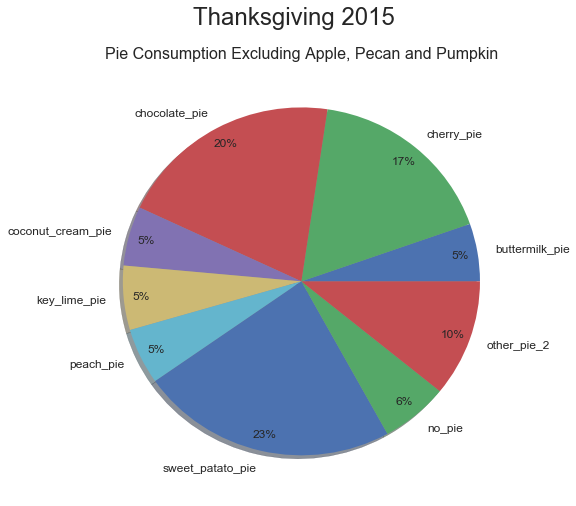

In [60]:
fig = plt.figure('Thanksgiving Pies', figsize=(8, 8), 
                 facecolor='white', edgecolor='black');
ax = plt.subplot2grid((1, 1), (0, 0));

subset_pie_count[subset_pie_count > 0].plot(kind='pie', autopct='%i%%',
                                            fontsize=12, pctdistance=0.9,
                                            shadow=True, ax=ax);
ax.set_ylabel('')
plt.suptitle('Thanksgiving 2015', fontsize=24);
plt.title('Pie Consumption Excluding Apple, Pecan and Pumpkin', fontsize=16);

### Look at the age distribution.

In [13]:
data.age.head()
data.age.tail()

0    [18, 29]
1    [18, 29]
2    [18, 29]
3    [30, 44]
4    [30, 44]
Name: age, dtype: object

1053    [30, 44]
1054        [60]
1055        [60]
1056         NaN
1057         NaN
Name: age, dtype: object

### Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).

In [14]:
data.age = data.age.apply(lambda x: np.mean(x))
data.head()
data.tail()

,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,23.5,Male,"[75000, 99999]",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,NaN,Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,23.5,Female,"[50000, 74999]",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,23.5,Male,"[0, 9999]",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,37.0,Male,[200000],Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,37.0,Male,"[100000, 124999]",Pacific


,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
1053,4335944082,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,Yes,No,No,NaN,Rural,37.0,Female,"[100000, 124999]",Mountain
1054,4335943173,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Suburban,60.0,Female,"[50000, 74999]",Pacific
1055,4335943060,Yes,NaN,Duck,Baked,NaN,Rice-based,NaN,None,NaN,...,Yes,Yes,Yes,No,NaN,Urban,60.0,Male,"[100000, 124999]",Pacific
1056,4335934708,Yes,Turkey,NaN,Baked,NaN,None,NaN,Homemade,NaN,...,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1057,4335894916,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN


### Examine the summary statistics of the age column now.

In [15]:
data.age.describe()

count    1025.000000
mean       44.264390
std        13.595774
min        23.500000
25%        37.000000
50%        52.000000
75%        60.000000
max        60.000000
Name: age, dtype: float64

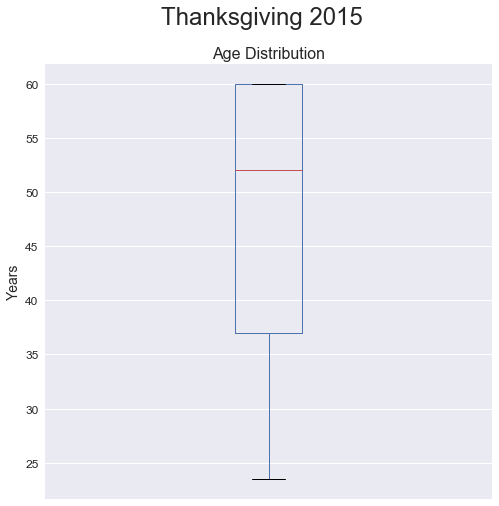

In [74]:
fig = plt.figure('Thanksgiving Ages', figsize=(8, 8), 
                 facecolor='white', edgecolor='black');
ax = plt.subplot2grid((1, 1), (0, 0));

data.age.plot(kind='box', fontsize=12, ax=ax);

ax.set_ylabel('Years', fontsize=14)
ax.get_xaxis().set_ticks([])
plt.suptitle('Thanksgiving 2015', fontsize=24);
plt.title('Age Distribution', fontsize=16);

### Look at the income distribution.

In [16]:
data.household_income.head()
data.household_income.tail()

0      [75000, 99999]
1      [50000, 74999]
2           [0, 9999]
3            [200000]
4    [100000, 124999]
Name: household_income, dtype: object

1053    [100000, 124999]
1054      [50000, 74999]
1055    [100000, 124999]
1056                 NaN
1057                 NaN
Name: household_income, dtype: object

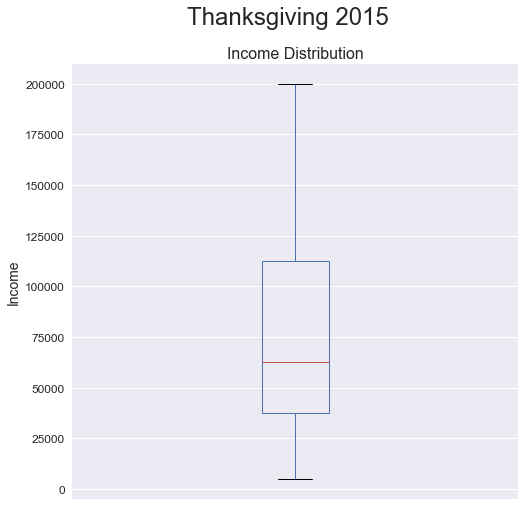

In [75]:
fig = plt.figure('Thanksgiving Incomes', figsize=(8, 8), 
                 facecolor='white', edgecolor='black');
ax = plt.subplot2grid((1, 1), (0, 0));

data.household_income.plot(kind='box', fontsize=12, ax=ax);

ax.set_ylabel('Income', fontsize=14)
ax.get_xaxis().set_ticks([])
plt.suptitle('Thanksgiving 2015', fontsize=24);
plt.title('Income Distribution', fontsize=16);

### Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).

In [17]:
data.household_income = data.household_income.apply(lambda x: np.mean(x))
data.head()
data.tail()

,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,23.5,Male,87499.5,Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,NaN,Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,23.5,Female,62499.5,East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,23.5,Male,4999.5,Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,37.0,Male,200000.0,Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,37.0,Male,112499.5,Pacific


,id,celebrate,main_dish,other_main_dish,cooking_method,other_cooking_method,stuffing,other_stuffing,cranberry,other_cranberry,...,hometown_friends,friendsgiving,shop_black_friday,work_retal,work_black_friday,home_description,age,gender,household_income,us_region
1053,4335944082,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,Yes,No,No,NaN,Rural,37.0,Female,112499.5,Mountain
1054,4335943173,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Suburban,60.0,Female,62499.5,Pacific
1055,4335943060,Yes,NaN,Duck,Baked,NaN,Rice-based,NaN,None,NaN,...,Yes,Yes,Yes,No,NaN,Urban,60.0,Male,112499.5,Pacific
1056,4335934708,Yes,Turkey,NaN,Baked,NaN,None,NaN,Homemade,NaN,...,Yes,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1057,4335894916,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN


### Examine the summary statistics of the income column now.

In [18]:
data.household_income.describe()

count       889.000000
mean      84513.043307
std       58203.612943
min        4999.500000
25%       37499.500000
50%       62499.500000
75%      112499.500000
max      200000.000000
Name: household_income, dtype: float64

### Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.

In [128]:
lower_income = data[data.household_income < 50e3].groupby('travel_distance').size()
higher_income = data[data.household_income > 150e3].groupby('travel_distance').size()
print(f'Income Less Than $50,000:\n\n{lower_income}')
print(f'\n\n\nIncome Greater Than $150,000:\n\n{higher_income}')

Income Less Than $50,000:

travel_distance
Thanksgiving is happening at my home--I won't travel at all                         106
Thanksgiving is local--it will take place in the town I live in                      92
Thanksgiving is out of town and far away--I have to drive several hours or fly       16
Thanksgiving is out of town but not too far--it's a drive of a few hours or less     64
dtype: int64



Income Greater Than $150,000:

travel_distance
Thanksgiving is happening at my home--I won't travel at all                         66
Thanksgiving is local--it will take place in the town I live in                     34
Thanksgiving is out of town and far away--I have to drive several hours or fly      15
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    25
dtype: int64


### Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.

In [29]:
pd.pivot_table(data=data, values=['age', 'household_income'], columns=['friendsgiving', 'hometown_friends'])

                  friendsgiving  hometown_friends
age               No             No                     46.731388
                                 Yes                    46.357923
                  Yes            No                     42.042105
                                 Yes                    39.578488
household_income  No             No                  89456.824480
                                 Yes                 89553.119048
                  Yes            No                  83124.552632
                                 Yes                 76315.319079
dtype: float64

### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

### Use groupby to examine the breakdown of income by type of cranberry sauce

In [302]:
cranberry_group = data.groupby(by=['cranberry', 'household_income'])
cran_size = cranberry_group.size()
cran_size

cranberry  household_income
Canned     4999.5              20
           17499.5             39
           37499.5             91
           62499.5             79
           87499.5             60
           112499.5            62
           137499.5            23
           162499.5            18
           187499.5            13
           200000.0            35
Homemade   4999.5              19
           17499.5             13
           37499.5             46
           62499.5             26
           87499.5             40
           112499.5            29
           137499.5            18
           162499.5            15
           187499.5             9
           200000.0            32
None       4999.5              13
           17499.5              7
           37499.5             22
           62499.5             19
           87499.5             23
           112499.5            14
           137499.5             6
           162499.5             5
           187499.5 

### Use agg to compute the mean and plot the results in a bar chart

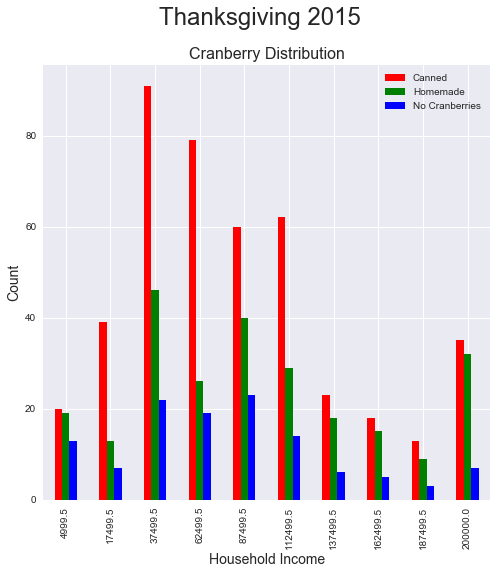

In [303]:
fig = plt.figure('Thanksgiving Cranberry', figsize=(8, 8), 
                 facecolor='white', edgecolor='black');
ax = plt.subplot2grid((1, 1), (0, 0));

cran_size.unstack(level=0).plot(kind='bar', color=['r', 'g', 'b'], legend=False, ax=ax);

ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Household Income', fontsize=14);
plt.suptitle('Thanksgiving 2015', fontsize=24);
plt.title('Cranberry Distribution', fontsize=16);
plt.legend(('Canned', 'Homemade', 'No Cranberries'), loc='best');

### Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"

In [224]:
cran_tofu = data[(data.cranberry == 'Homemade') & (data.main_dish == 'Tofurkey')]
group_cran_tofu = cran_tofu.groupby(['cranberry', 'household_income'])
cran_tofu_size = group_cran_tofu.size()
cran_tofu_size

cranberry  household_income
Homemade   4999.5              1
           17499.5             1
           37499.5             1
           62499.5             1
           87499.5             1
           137499.5            1
dtype: int64

### Choose an appropriate plot or chart to visualize the results

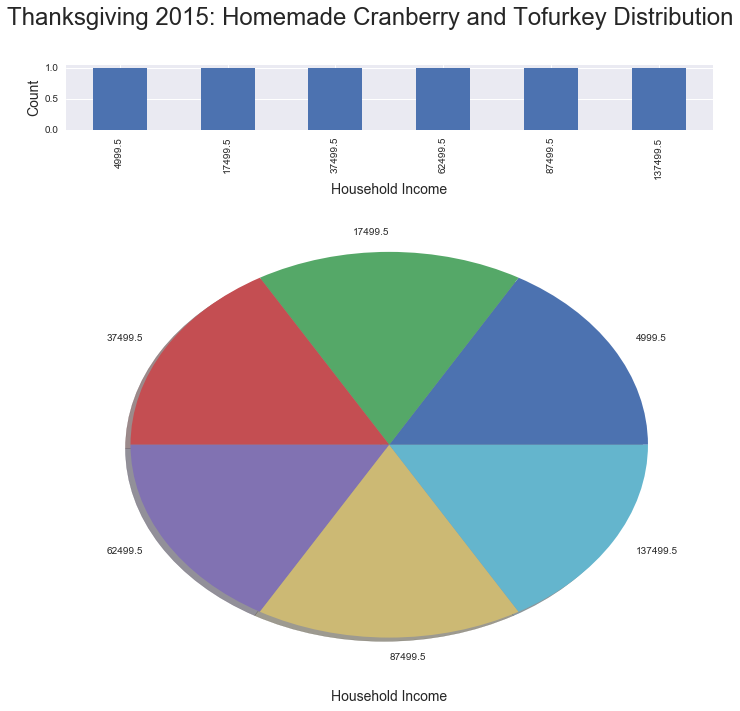

In [264]:
cran_tofu_count = group_cran_tofu.agg(['count'])

fig = plt.figure('Thanksgiving Cranberry Tofurkey', figsize=(10, 10), 
                 facecolor='white', edgecolor='black');
ax0 = plt.subplot2grid((10, 1), (0, 0), rowspan=2);
ax1 = plt.subplot2grid((10, 1), (2, 0), rowspan=8);

cran_tofu_size.unstack(level=0).plot(kind='bar', legend=False, ax=ax0);
ax0.set_ylabel('Count', fontsize=14)
ax0.set_xlabel('Household Income', fontsize=14);

plt.tight_layout();
plt.suptitle('Thanksgiving 2015: Homemade Cranberry and Tofurkey Distribution',
             fontsize=24);
plt.subplots_adjust(top=0.9)

cran_tofu_size.unstack(level=0).plot(kind='pie', legend=False, subplots=True, 
                                     shadow=True, ax=ax1);
ax1.set_ylabel('')
ax1.set_xlabel('Household Income', fontsize=14);